# Analisis de Redes Sociales

La presente investigación trata sobre el consumo generado y consumido por estudiantes universitarios de la costa Ecuatoriana. Investigaremos cuáles son las redes sociales más utilizadas por los estudiantes universitarios, sus gustos al momento de escoger a quien seguir, cuantas horas al día le dedican a estas redes etc.

---

Comenzamos importando los modulos que necesitamos para el procesamiento de datos y visualizando las primeras 3 filas.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [16]:
df = pd.read_csv("CorrectedDF.csv")
df.drop("Index#", axis=1, inplace=True) #get rid of first column 
df.head(3)

,Universidades,NSE,Prefieres que tu cuenta sea Privada o Pública,Que redes sociales utilizas más (siendo 1 el principal) [Instagram],Que redes sociales utilizas más (siendo 1 el principal) [Facebook],Que redes sociales utilizas más (siendo 1 el principal) [Whatsapp],Que redes sociales utilizas más (siendo 1 el principal) [Twitter],Que redes sociales utilizas más (siendo 1 el principal) [YouTube],Qué tipo de contenido es el que más consumes dentro de redes sociales. [Memes],Qué tipo de contenido es el que más consumes dentro de redes sociales. [Noticias],...,Que tipo de jergas utilizan [Dale],Que tipo de jergas utilizan [Posi],Que tipo de jergas utilizan [Que trip],Que tipo de contenido comparten dentro de las redes [Noticias],Que tipo de contenido comparten dentro de las redes [Memes],Que tipo de contenido comparten dentro de las redes [Comida],Que tipo de contenido comparten dentro de las redes [Ambiental],Que tipo de contenido comparten dentro de las redes [Mascotas],Que tipo de contenido comparten dentro de las redes [Deportes],Que tipo de contenido comparten dentro de las redes [Académico]
0,Blue hill,alto,Privada,1,4,2,5,3,1,4,...,6.0,7.0,5.0,3,1,4,6,5,2,7
1,Blue hill,alto,Privada,1,4,2,5,3,1,4,...,6.0,7.0,5.0,3,1,4,6,5,2,7
2,ECOTEC,medio,Privada,1,1,1,1,1,3,3,...,1.0,2.0,3.0,3,2,5,7,7,3,3


# Distribucion de Encuestados por Universidades

count                          283
unique                          29
top       Universidad de Guayaquil
freq                            63
Name: Universidades, dtype: object


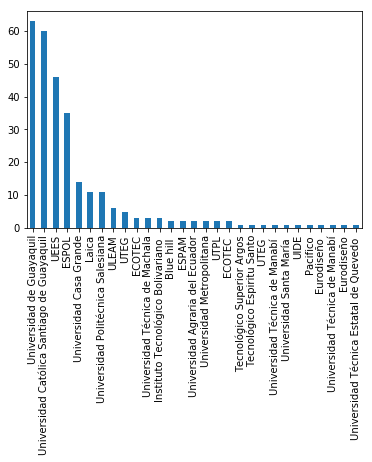

In [17]:
df_field = df['Universidades']
#print(df_field.unique())
#print(df_field.value_counts())
print(df_field.describe())
df_field.value_counts().plot.bar()

# Clasificacion de Redes Sociales por Nivel Socio-Economico

In [18]:
SE_1 = df.groupby('NSE')['Que redes sociales utilizas más (siendo 1 el principal) [Instagram]'].value_counts()
SE_2 = df.groupby('NSE')['Que redes sociales utilizas más (siendo 1 el principal) [Facebook]'].value_counts()
SE_3 = df.groupby('NSE')['Que redes sociales utilizas más (siendo 1 el principal) [Whatsapp]'].value_counts()
SE_4 = df.groupby('NSE')['Que redes sociales utilizas más (siendo 1 el principal) [Twitter]'].value_counts()
SE_5 = df.groupby('NSE')['Que redes sociales utilizas más (siendo 1 el principal) [YouTube]'].value_counts()
#print(SE_1)

Niv_SE = ['Bajo', 'Medio', 'Alto']
labels = ['Instagram', 'Facebook','Whatsapp','Twitter','Youtube']

SE = np.array([
    [SE_1[5],SE_1[10],SE_1[0]],
    [SE_2[5],SE_2[10],SE_2[0]],
    [SE_3[5],SE_3[10],SE_3[0]],
    [SE_4[5],SE_4[10],SE_4[0]],
    [SE_5[5],SE_5[10],SE_5[0]]])


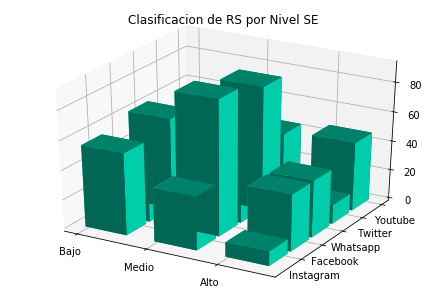

      Instagram Facebook Whatsapp Twitter Youtube
Bajo         56       47       92      44      39
Medio        13       10       20      10      13
Alto         62       37       84      39      47


In [19]:
# --------Create Graph--------
fig = plt.figure()
ax1 = Axes3D(fig)

ax1.set_title('Clasificacion de RS por Nivel SE')
ax1.set_xticks([1,2,3]) 
ax1.set_yticks(np.arange(1,len(labels)+1)+0.85) 
ax1.set_xticklabels(Niv_SE)
ax1.set_yticklabels(labels)

xpos = np.repeat(np.array([1,2,3]), len(labels)) # bajo, medio, alto
ypos = np.tile(np.arange(1,len(labels)+1),len(Niv_SE)) 
num_elements = len(xpos)
zpos = np.zeros(num_elements)

dx = np.repeat(.6 , num_elements)
dy = np.repeat(.85 , num_elements)
dz = SE.flatten()

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='#00ceaa')
plt.show()

# -------Create Table-------
add_space = np.array([[''] + labels])
table = np.concatenate((add_space.T,np.concatenate((np.array([Niv_SE]),SE),axis=0)),axis=1).T
print(pd.DataFrame(data=table[1:,1:],
                  index=table[1:,0],
                  columns=table[0,1:]))

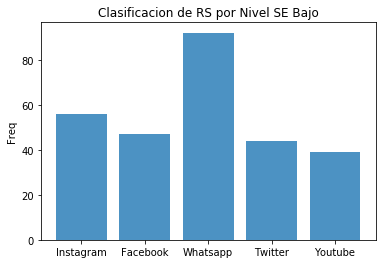

In [20]:
val = SE.T[0,:]
labels_pos = np.arange(1,len(val)+1)

plt.bar(labels_pos, val, align='center', alpha=0.8)
plt.xticks(labels_pos, labels)
plt.ylabel('Freq')
plt.title('Clasificacion de RS por Nivel SE Bajo')

plt.show()


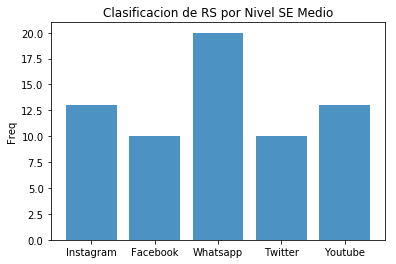

In [21]:
val = SE.T[1,:]
labels_pos = np.arange(1,len(val)+1)

plt.bar(labels_pos, val, align='center', alpha=0.8)
plt.xticks(labels_pos, labels)
plt.ylabel('Freq')
plt.title('Clasificacion de RS por Nivel SE Medio')

plt.show()


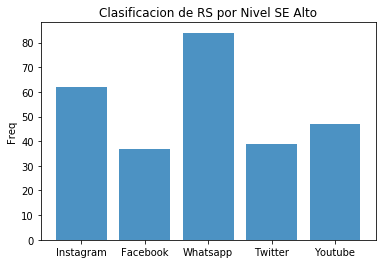

In [22]:
val = SE.T[2,:]
labels_pos = np.arange(1,len(val)+1)

plt.bar(labels_pos, val, align='center', alpha=0.8)
plt.xticks(labels_pos, labels)
plt.ylabel('Freq')
plt.title('Clasificacion de RS por Nivel SE Alto')

plt.show()


# Clasificacion de Contenido Social por Nivel Socio-Economico

## Contenido Generado

In [23]:
SE_1 = df.groupby(['NSE','Que tipo de contenido generan dentro de las redes sociales [Crean memes?]']).size()
SE_2 = df.groupby(['NSE','Que tipo de contenido generan dentro de las redes sociales [Crean noticias?]']).size()
SE_3 = df.groupby(['NSE','Que tipo de contenido generan dentro de las redes sociales [Generan noticias de ayuda social?]']).size()
SE_4 = df.groupby(['NSE','Que tipo de contenido generan dentro de las redes sociales [Generas frases de empoderamiento de motivación personal?]']).size()
SE_5 = df.groupby(['NSE','Que tipo de contenido generan dentro de las redes sociales [Información personal]']).size()
#print(SE_5)

Niv_SE = ['Bajo', 'Medio', 'Alto']
labels = ['Memes', 'Noticia','Ayuda Social','Frase Motivacional','Info Personal']

SE = np.array([
    [SE_1[7],SE_1[14],SE_1[1]],
    [SE_2[7],SE_2[14],SE_2[1]],
    [SE_3[7],SE_3[14],SE_3[1]],
    [SE_4[7],SE_4[14],SE_4[1]],
    [SE_5[7],SE_5[14],SE_5[1]]])

#print(SE)

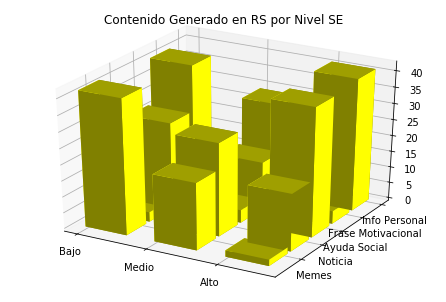

      Memes Noticia Ayuda Social Frase Motivacional Info Personal
Bajo     42      41           29                 29            40
Medio     3       4            4                  2             4
Alto     27      21           15                 18            41


In [24]:
# --------Create Graph--------
fig = plt.figure()
ax1 = Axes3D(fig)

ax1.set_title('Contenido Generado en RS por Nivel SE')
ax1.set_xticks([1,2,3])  
ax1.set_yticks(np.arange(1,len(labels)+1)+0.85) 
ax1.set_xticklabels(Niv_SE)
ax1.set_yticklabels(labels)

xpos = np.repeat(np.array([1,2,3]), len(labels)) # bajo, medio, alto
ypos = np.tile(np.arange(1,len(labels)+1),len(Niv_SE)) 
num_elements = len(xpos)
zpos = np.zeros(num_elements)

dx = np.repeat(.6 , num_elements)
dy = np.repeat(.85 , num_elements)
dz = SE.flatten()

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='yellow')
plt.show()

# -------Create Table-------
add_space = np.array([[''] + labels])
table = np.concatenate((add_space.T,np.concatenate((np.array([Niv_SE]),SE),axis=0)),axis=1).T
print(pd.DataFrame(data=table[1:,1:],
                  index=table[1:,0],
                  columns=table[0,1:]))

## Contenido Compartido

In [25]:
SE_1 = df.groupby(['NSE','Que tipo de contenido comparten dentro de las redes [Noticias]']).size()
SE_2 = df.groupby(['NSE','Que tipo de contenido comparten dentro de las redes [Comida]']).size()
SE_3 = df.groupby(['NSE','Que tipo de contenido comparten dentro de las redes [Ambiental]']).size()
SE_4 = df.groupby(['NSE','Que tipo de contenido comparten dentro de las redes [Mascotas]']).size()
SE_5 = df.groupby(['NSE','Que tipo de contenido comparten dentro de las redes [Deportes]']).size()
SE_6 = df.groupby(['NSE','Que tipo de contenido comparten dentro de las redes [Académico]']).size()

#print(SE_1)

Niv_SE = ['Bajo', 'Medio', 'Alto']
labels = ['Noticia','Comida', 'Ambiental','Mascotas','Deportes', 'Academicos']

SE = np.array([
    [SE_1[7],SE_1[14],SE_1[0]],
    [SE_2[7],SE_2[14],SE_2[0]],
    [SE_3[7],SE_3[14],SE_3[0]],
    [SE_4[7],SE_4[14],SE_4[0]],
    [SE_5[7],SE_5[14],SE_5[0]],
    [SE_6[7],SE_6[14],SE_6[0]]])

#print(SE)

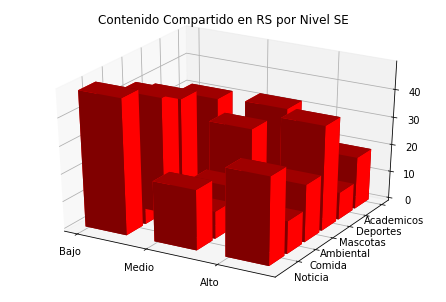

      Noticia Comida Ambiental Mascotas Deportes Academicos
Bajo       49     38        22       32       32         38
Medio      13      8        10        6       12         10
Alto       42     31        15       32       21         19


In [26]:
# --------Create Graph--------
fig = plt.figure()
ax1 = Axes3D(fig)

ax1.set_title('Contenido Compartido en RS por Nivel SE')
ax1.set_xticks([1,2,3]) 
ax1.set_yticks(np.arange(1,len(labels)+1)+0.85) 
ax1.set_xticklabels(Niv_SE)
ax1.set_yticklabels(labels)

xpos = np.repeat(np.array([1,2,3]), len(labels)) # bajo, medio, alto
ypos = np.tile(np.arange(1,len(labels)+1),len(Niv_SE)) 
num_elements = len(xpos)
zpos = np.zeros(num_elements)

dx = np.repeat(.6 , num_elements)
dy = np.repeat(.85 , num_elements)
dz = SE.flatten()

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='red')
plt.show()

# -------Create Table-------
add_space = np.array([[''] + labels])
table = np.concatenate((add_space.T,np.concatenate((np.array([Niv_SE]),SE),axis=0)),axis=1).T
print(pd.DataFrame(data=table[1:,1:],
                  index=table[1:,0],
                  columns=table[0,1:]))

## Contenido Consumido

In [27]:
SE_1 = df.groupby(['NSE','Qué tipo de contenido es el que más consumes dentro de redes sociales. [Memes]']).size()
SE_2 = df.groupby(['NSE','Qué tipo de contenido es el que más consumes dentro de redes sociales. [Noticias]']).size()
SE_3 = df.groupby(['NSE','Qué tipo de contenido es el que más consumes dentro de redes sociales. [Deportes]']).size()
SE_4 = df.groupby(['NSE','Qué tipo de contenido es el que más consumes dentro de redes sociales. [Motivación Personal]']).size()
SE_5 = df.groupby(['NSE','Qué tipo de contenido es el que más consumes dentro de redes sociales. [Preferencia Gastronómica]']).size()
SE_6 = df.groupby(['NSE','Qué tipo de contenido es el que más consumes dentro de redes sociales. [Mascotas]']).size()
SE_7 = df.groupby(['NSE','Qué tipo de contenido es el que más consumes dentro de redes sociales. [Intereses Ambientales]']).size()
#print(SE_7)

Niv_SE = ['Bajo', 'Medio', 'Alto']
labels = ['Memes','Noticia','Deportes','Motivacion', 'Gastronomia','Mascotas','Ambiental']
#bajo medio alto
SE = np.array([
    [SE_1[7],SE_1[14],SE_1[1]],
    [SE_2[7],SE_2[14],SE_2[1]],
    [SE_3[7],SE_3[14],SE_3[1]],
    [SE_4[7],SE_4[14],SE_4[1]],
    [SE_5[7],SE_5[14],SE_5[1]],
    [SE_6[7],SE_6[14],SE_6[1]],
    [SE_7[7],SE_7[14],SE_7[1]]])

#print(SE)

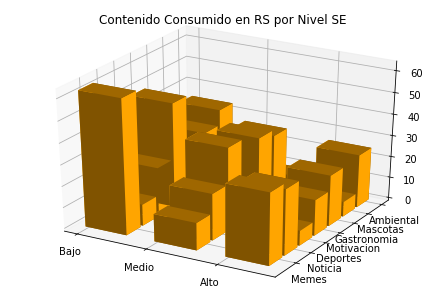

      Memes Noticia Deportes Motivacion Gastronomia Mascotas Ambiental
Bajo     63      49       34         39          32       31        24
Medio    10      10       13          5           9        7         7
Alto     23      27       22         35          34       17        25


In [28]:
# --------Create Graph--------
fig = plt.figure()
ax1 = Axes3D(fig)

ax1.set_title('Contenido Consumido en RS por Nivel SE')
ax1.set_xticks([1,2,3])
ax1.set_yticks(np.arange(1,len(labels)+1)+0.85) 
ax1.set_xticklabels(Niv_SE)
ax1.set_yticklabels(labels)

xpos = np.repeat(np.array([1,2,3]), len(labels)) # bajo, medio, alto
ypos = np.tile(np.arange(1,len(labels)+1),len(Niv_SE)) 
num_elements = len(xpos)
zpos = np.zeros(num_elements)

dx = np.repeat(.6 , num_elements)
dy = np.repeat(.85 , num_elements)
dz = SE.flatten()

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='orange')
plt.show()

# -------Create Table-------
add_space = np.array([[''] + labels])
table = np.concatenate((add_space.T,np.concatenate((np.array([Niv_SE]),SE),axis=0)),axis=1).T
print(pd.DataFrame(data=table[1:,1:],
                  index=table[1:,0],
                  columns=table[0,1:]))